## Problem 1 : Predicting CentralAir using SalePric

Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class. Import the complete dataset “train.csv” in Jupyter, as  houseData = pd.read_csv('train.csv') 

<b>a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship. You may also want to check the mutual relationship by plotting the two variables using a swarmplot. </b>
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [4]:
houseData = pd.read_csv("train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
sb.catplot( y="CentralAir", data=houseData, kind='box')

In [34]:
centralAir = pd.DataFrame(houseData['CentralAir'])  # Response
salePrice = pd.DataFrame(houseData['SalePrice'])      # Predictor

print(centralAir.shape)
print(salePrice.shape)

(1460, 1)
(1460, 1)


In [40]:
# Train Set : 1100 samples
centralAir_train = pd.DataFrame(centralAir[:1100])
salePrice_train = pd.DataFrame(salePrice[:1100])

# Test Set : 360 samples
centralAir_test = pd.DataFrame(centralAir[-360:])
salePrice_test = pd.DataFrame(salePrice[-360:])


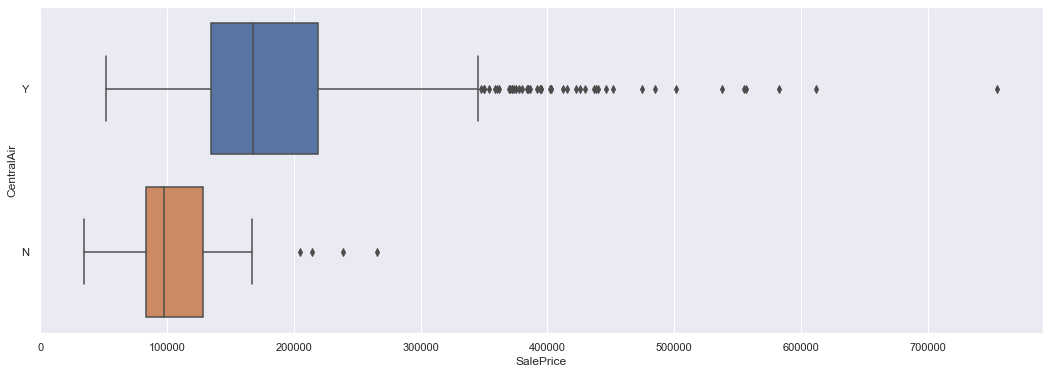

In [42]:
# Create a joint dataframe by concatenating Total and Legendary
jointDF = pd.concat([centralAir_train, salePrice_train], axis = 1, join_axes = [centralAir_train.index])

# Joint Boxplot of Total Train against Legendary Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

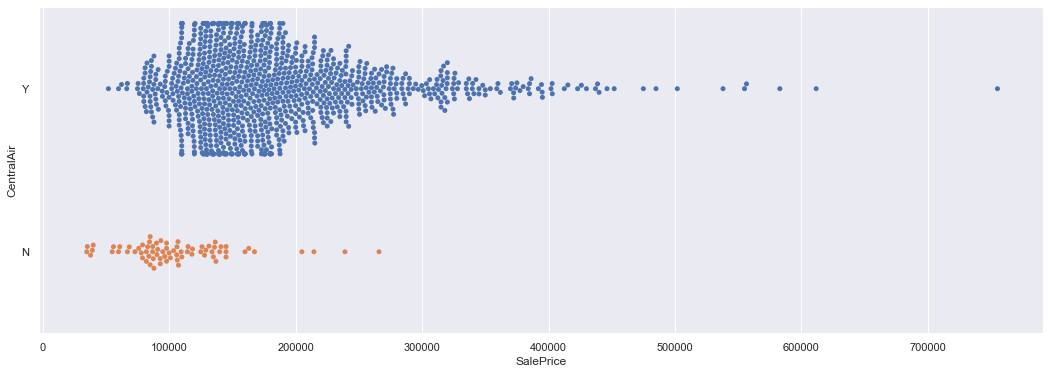

In [43]:
# Joint Swarmplot of Total Train against Legendary Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

<b>
    b) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier 
 
c) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows). 
 
d) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.  
 
y_train = pd.DataFrame(houseData_train['CentralAir'])  X_train = pd.DataFrame(houseData_train['SalePrice']) 
 
 </b>

In [38]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [44]:
# Train the Decision Tree Classifier model
dectree.fit(salePrice_train, centralAir_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

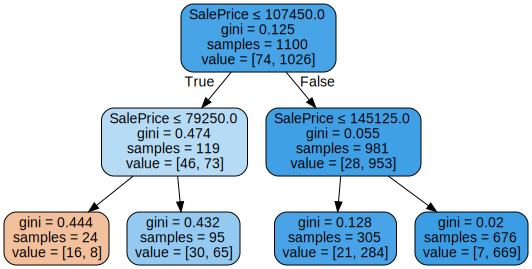

In [45]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = salePrice_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.94


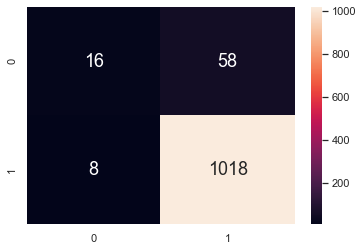

In [46]:
# Predict Legendary corresponding to Total Train
central_air_pred = dectree.predict(salePrice_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePrice_train, centralAir_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(centralAir_train, central_air_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9472222222222222


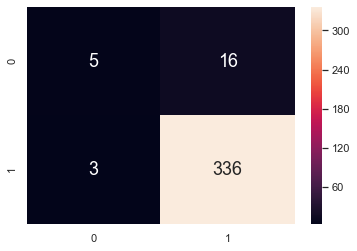

In [47]:
# Predict Legendary corresponding to Total test
central_air_pred = dectree.predict(salePrice_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePrice_test, centralAir_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(centralAir_test, central_air_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Problem 2 : Predicting CentralAir using Other Variables 

Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF' one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'. 

In [69]:
def predict(x,y):
    x = pd.DataFrame(houseData[x])  # Response (CentralAir)
    y = pd.DataFrame(houseData[y])  # Predictor (y)

    x_name = x
    y_name = y
    # Train Set : 1100 samples
    x_train = pd.DataFrame(x[:1100])
    y_train = pd.DataFrame(y[:1100])

    # Test Set : 360 samples
    x_test = pd.DataFrame(x[-360:])
    y_test = pd.DataFrame(y[-360:])
    '''
    # Create a joint dataframe by concatenating Total and Legendary
    jointDF = pd.concat([x_train, y_train], axis = 1, join_axes = [x_train.index])

    # Joint Boxplot of Total Train against Legendary Train
    f, axes = plt.subplots(1, 1, figsize=(18, 6))
    sb.swarmplot(x = y_name, y = x_name, data = jointDF, orient = "h")
    '''


    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 2)

    # Train the Decision Tree Classifier model
    dectree.fit(y_train, x_train)
    # Export the Decision Tree as a dot object
    treedot = export_graphviz(dectree,                                      # the model
                              feature_names = y_train.columns,          # the features 
                              out_file = None,                              # output file
                              filled = True,                                # node colors
                              rounded = True,                               # make pretty
                              special_characters = True)                    # postscript

    graphviz.Source(treedot)
    
    
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    
    # Predict Legendary corresponding to Total Train
    x_train_pred = dectree.predict(y_train)

    # Print the Classification Accuracy
    print("Classification Accuracy \t:", dectree.score(y_train, x_train))

    sb.heatmap(confusion_matrix(x_train, x_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])

    # Predict Legendary corresponding to Total test
    x_test_pred = dectree.predict(y_test)

    # Print the Classification Accuracy
    print("Classification Accuracy \t:", dectree.score(y_test, x_test))

    sb.heatmap(confusion_matrix(x_test, x_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

Classification Accuracy 	: 0.9354545454545454
Classification Accuracy 	: 0.9444444444444444


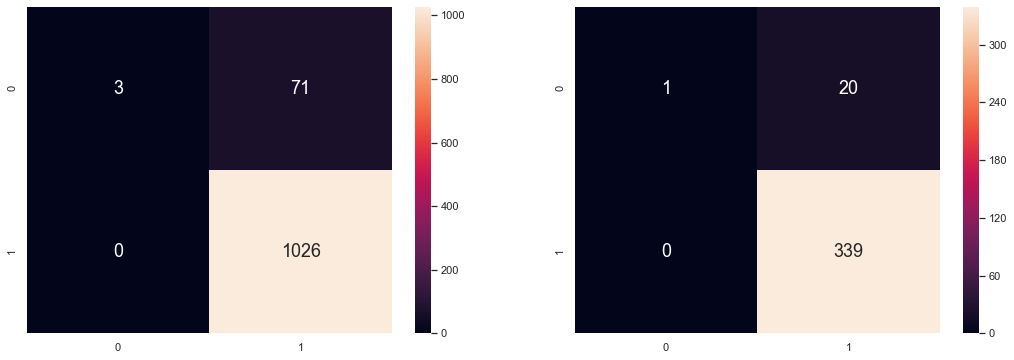

In [70]:
predict('CentralAir','GrLivArea')

Classification Accuracy 	: 0.9336363636363636
Classification Accuracy 	: 0.9416666666666667


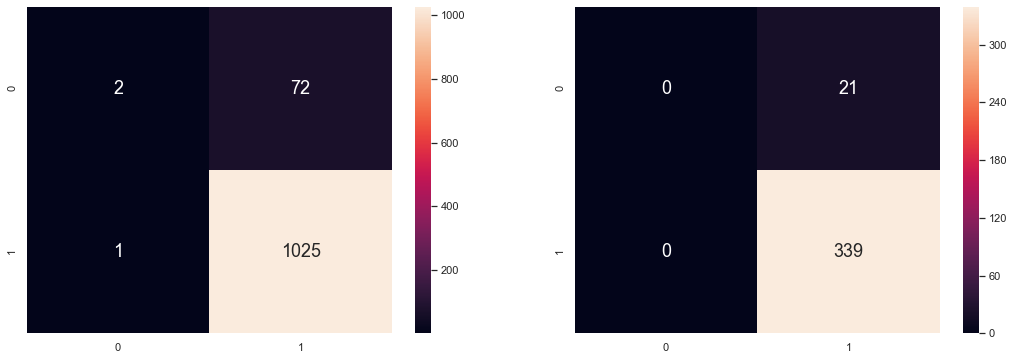

In [71]:
predict('CentralAir','LotArea')

Classification Accuracy 	: 0.9327272727272727
Classification Accuracy 	: 0.9416666666666667


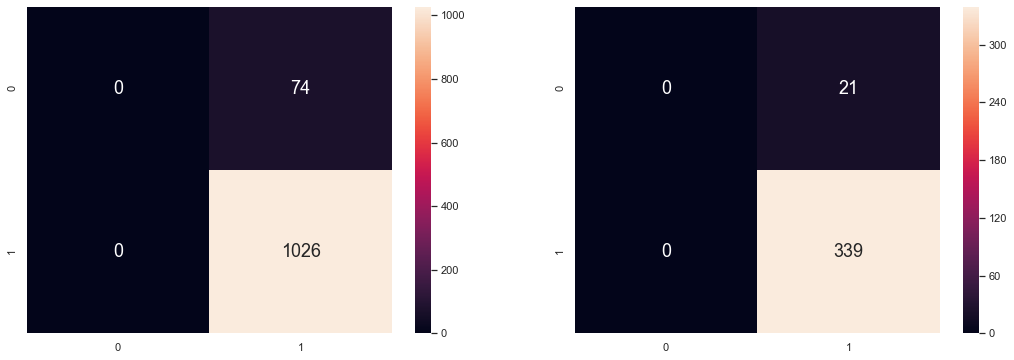

In [72]:
predict('CentralAir', 'TotalBsmtSF')